In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import explore as e
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [4]:
#select only rows where City == New York

df = df[df['City'] == 'New York']

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
169769,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
169770,1743-12-01,NaN,NaN,New York,United States,40.99N,74.56W
169771,1744-01-01,NaN,NaN,New York,United States,40.99N,74.56W
169772,1744-02-01,NaN,NaN,New York,United States,40.99N,74.56W
169773,1744-03-01,NaN,NaN,New York,United States,40.99N,74.56W


In [6]:
df.isnull().sum()

dt                                 0
AverageTemperature               120
AverageTemperatureUncertainty    120
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 169769 to 173007
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3119 non-null   object 
 1   AverageTemperature             3119 non-null   float64
 2   AverageTemperatureUncertainty  3119 non-null   float64
 3   City                           3119 non-null   object 
 4   Country                        3119 non-null   object 
 5   Latitude                       3119 non-null   object 
 6   Longitude                      3119 non-null   object 
dtypes: float64(2), object(5)
memory usage: 194.9+ KB


In [9]:
#convert dt to datetime and rename column

df.dt = pd.to_datetime(df.dt)

In [10]:
df = df.rename(columns = {
                         'dt' : 'date',
                         'AverageTemperature': 'avg_temp',
                         'AverageTemperatureUncertainty': 'avg_temp_uncertainty'
                         })

In [11]:
#check dtypes
df.dtypes

date                    datetime64[ns]
avg_temp                       float64
avg_temp_uncertainty           float64
City                            object
Country                         object
Latitude                        object
Longitude                       object
dtype: object

In [12]:
#dropping unneeded columns
df = df.drop(['Latitude', 'Longitude', 'Country', 'City'], axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 169769 to 173007
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3119 non-null   datetime64[ns]
 1   avg_temp              3119 non-null   float64       
 2   avg_temp_uncertainty  3119 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 97.5 KB


In [14]:
df = df.set_index('date')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3119 entries, 1743-11-01 to 2013-09-01
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_temp              3119 non-null   float64
 1   avg_temp_uncertainty  3119 non-null   float64
dtypes: float64(2)
memory usage: 73.1 KB


In [16]:
df.head()

,avg_temp,avg_temp_uncertainty
date,,
1743-11-01,3.264,1.665
1744-04-01,9.788,2.151
1744-05-01,15.708,1.506
1744-06-01,21.210,1.455
1744-07-01,22.207,1.305


In [17]:
df.isnull().sum()

avg_temp                0
avg_temp_uncertainty    0
dtype: int64

In [18]:
#sort date
df.index.sort_values()

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='date', length=3119, freq=None)

In [19]:
df.head()
#do I need temp uncertainty?

,avg_temp,avg_temp_uncertainty
date,,
1743-11-01,3.264,1.665
1744-04-01,9.788,2.151
1744-05-01,15.708,1.506
1744-06-01,21.210,1.455
1744-07-01,22.207,1.305


plot temp over time

<AxesSubplot:xlabel='date'>

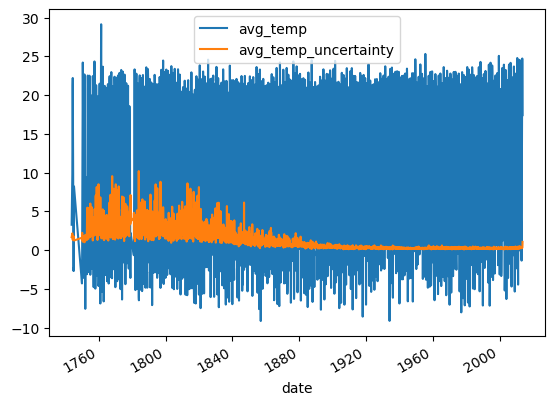

In [20]:
df.plot()

<AxesSubplot:xlabel='date'>

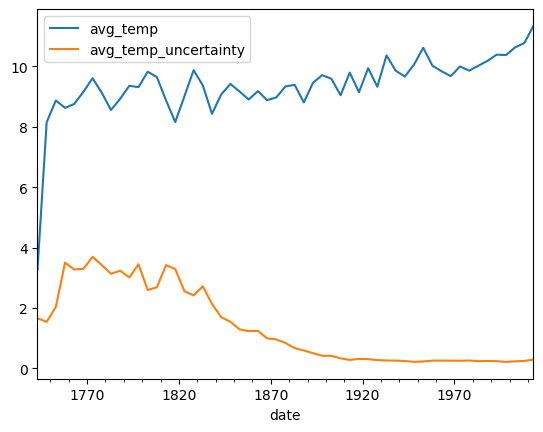

In [21]:
#resample for every 2 years and plot
df.resample('5Y').mean().plot()



Uncertainty evens out around 1920 so I'll take the past 100 years data and drop the uncertainty column

In [22]:
df = df[df.index > '1923-01-01']

In [23]:
df = df.drop(columns= ['avg_temp_uncertainty'])

In [24]:
df.shape

(1088, 1)

Need to make sure there is only 1 entry per month

In [25]:
df.resample('M').mean()

,avg_temp
date,
1923-02-28,-5.401
1923-03-31,1.233
1923-04-30,8.841
1923-05-31,14.028
1923-06-30,21.221
...,...
2013-05-31,15.544
2013-06-30,20.892
2013-07-31,24.722


In [26]:
len(df.index)-len(df.index.drop_duplicates())

0

In [27]:
df.index.max()

Timestamp('2013-09-01 00:00:00')

Make wrangle function then split

break into train and val_test first, then split val_test into val and test


In [28]:
#split val_test to include the last 6 years
train = df[df.index < '2007-09-01']
val_test = df[df.index >= '2007-09-01']


In [29]:
# 5 years before the final/test year
val = val_test[val_test.index < '2012-09-01']

# last year
test = val_test[val_test.index >= '2012-10-01']

In [30]:
#put split into function

train = df[df.index < '2007-09-01']
val_test = df[df.index >= '2007-09-01']

# 5 years before the final/test year
val = val_test[val_test.index < '2012-09-01']

# last year
test = val_test[val_test.index >= '2012-10-01']

In [31]:
#testing function to see if it works


In [32]:
train.shape, val.shape, test.shape
#confirmed val set is 5 years (60 months), and test set is 1 year (12 months)

((1015, 1), (60, 1), (12, 1))

<AxesSubplot:xlabel='date'>

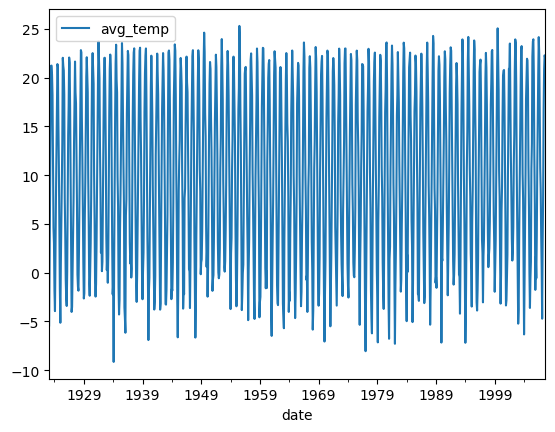

In [33]:
train.plot()

In [34]:
df.index.max()

Timestamp('2013-09-01 00:00:00')

In [35]:
#create new features for rolling averages

In [36]:
df.head()

,avg_temp
date,
1923-02-01,-5.401
1923-03-01,1.233
1923-04-01,8.841
1923-05-01,14.028
1923-06-01,21.221


data is clean and split

<AxesSubplot:title={'center':'Monthly Average Temp Increases Over Time'}, xlabel='date'>

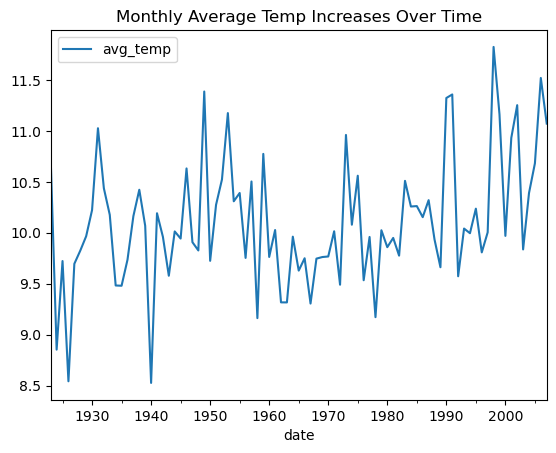

In [37]:
train.resample('Y').mean().plot(title= 'Monthly Average Temp Increases Over Time')

# Modeling


In [ ]:
#get baseline
#rolling average



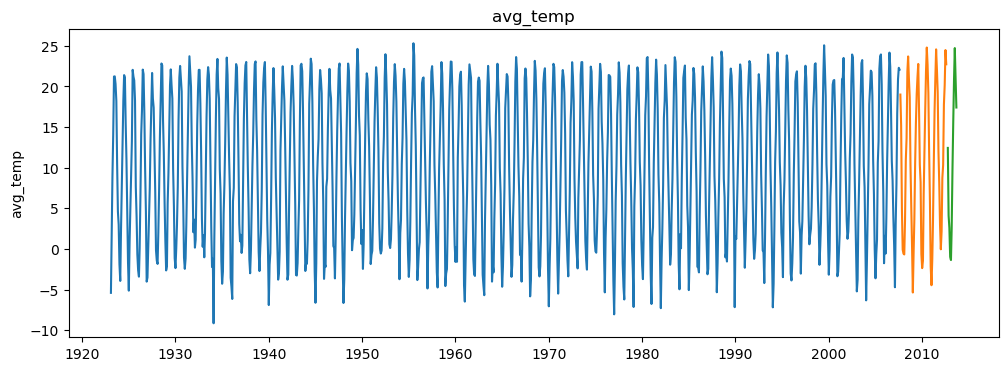

In [43]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(val[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [ ]:
# evaluation function to compute rmse
from math import sqrt


def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [44]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [ ]:
target_var = df.avg_temp

In [ ]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

items = round(train['items_sold'].rolling(period).mean().iloc[-1], 2)
dollars = round(train['dollars_sold'].rolling(period).mean().iloc[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'items_sold': [items],
                            'dollars_sold': [dollars],
                           }, index = validate.index)
yhat_df.head(2)


In [ ]:
y = train['avg_temp']

train['y_preds'] = 

y_pred = pd.DataFrame(y_hat)